In [126]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

In [127]:
seaborn.set()

In [128]:
#data = pd.read_csv('test_df2.csv')
#data = pd.read_csv('music_db.csv')
data = pd.read_csv('benedictquinn_music.csv')
data.head(3)

,user_name,nickname,signature,verified,follower_count,following_count,likes_count,video_count,collabs,hashtags
0,benedictquinn,Ben Quinn,oh hey!\r\nguitarist and producer \r\ngo follo...,False,800,131,4952,69,['jasmineoakleymusic'],"['asktiktok', 'music', 'instrumental', 'chill'..."
1,jasmineoakleymusic,Jasmine Oakley,Singer/Artist ✨,False,5547,55,65200,53,"['benedictquinn', 'thatdappermusician', 'ruben...","['gospel', 'singer', 'piano', 'fyp', 'fy', 'rn..."
2,thatdappermusician,Myron Evans,Keys mainly🎹among other things,False,678,440,5981,57,"['tiktok', 'rjthecomposer', 'jeremyolenski', '...","['christmas', 'piano', 'jazz', 'ewf', 'septemb..."


<AxesSubplot:title={'center':'Repartition verified users'}, ylabel='user_name'>

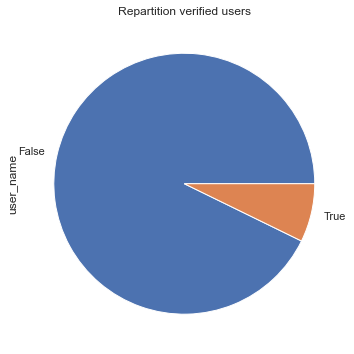

In [129]:
data.groupby(data.verified).count().user_name.plot.pie(title = 'Repartition verified users', figsize=(11, 6))

<AxesSubplot:title={'center':'Distrubituion du nombre de followers par utilisateurs'}, ylabel='Frequency'>

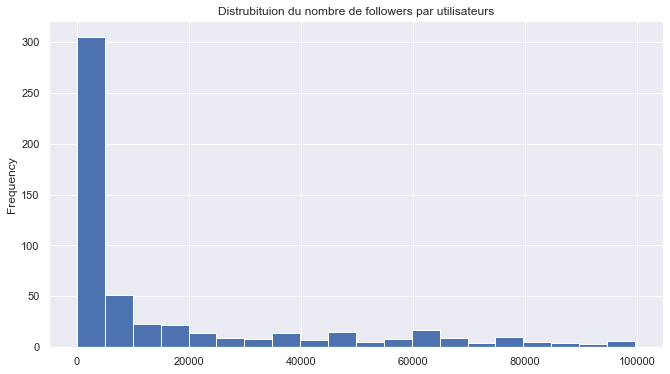

In [130]:
data.follower_count.plot.hist(title = 'Distrubituion du nombre de followers par utilisateurs', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distrubituion du nombre de followings par utilisateurs'}, ylabel='Frequency'>

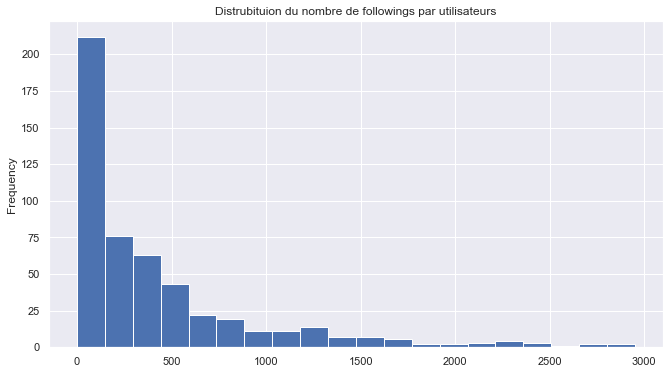

In [131]:
data[data['following_count'] < 3000].following_count.plot.hist(title = 'Distrubituion du nombre de followings par utilisateurs', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distrubituion du nombre de likes par utilisateurs'}, ylabel='Frequency'>

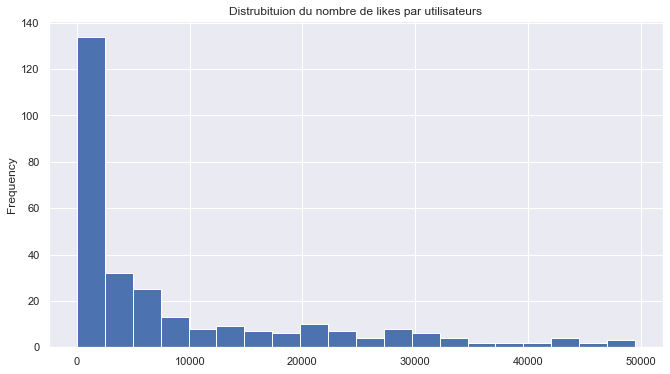

In [132]:
data[data['likes_count'] < 50000].likes_count.plot.hist(title = 'Distrubituion du nombre de likes par utilisateurs', figsize=(11, 6), bins=20)

Text(0.5, 1.0, 'Nombre de collabs')

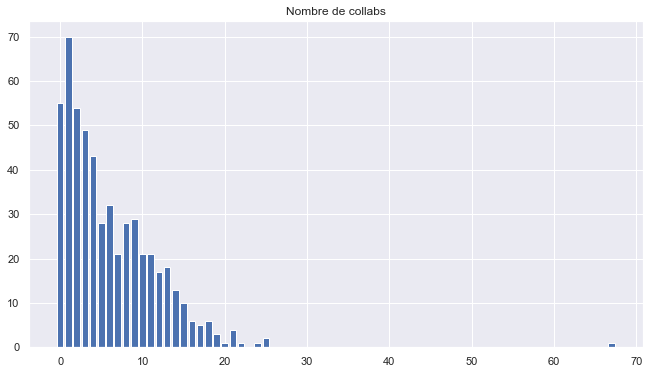

In [133]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(ast.literal_eval(data.collabs[i])))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs')

Text(0.5, 1.0, 'Nombre dutilisation des hashtags les plus fréquents')

C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


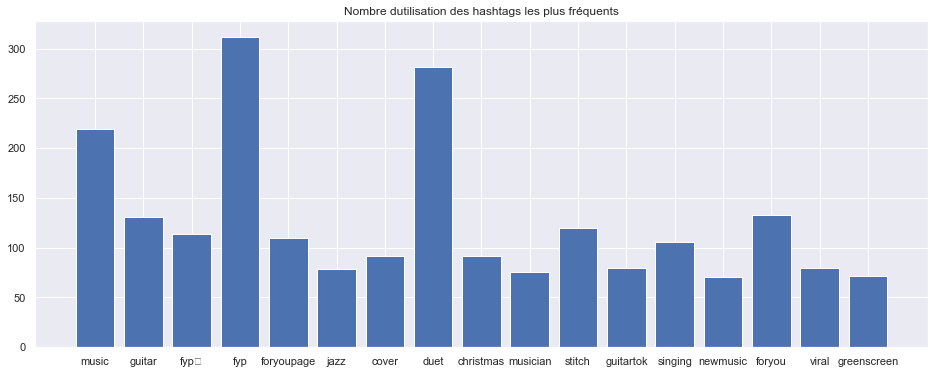

In [134]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = ast.literal_eval(data.hashtags[i])
    for w in H_line:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items() if c > 70})
plt.bar(res.keys(), res.values())
plt.title('Nombre dutilisation des hashtags les plus fréquents')

In [135]:
style = ['jazz', 'funk', 'rock', 'pop', 'rap', 'metal', 'rnb', 'hiphop', 'indie',
         'groove', 'classical', 'neosoul', 'indiemusic',
         'blues', 'punk', 'folk', 'gospel', 'dubstep', 'house', 'electro']
         
instrument =['guitar', 'bass', 'piano', 'drums',
              'tuba', 'chords', 'saxophone', 'violin', 'flute', 'cello']

vocalist = ['sing', 'singer', 'singingchallenge']

In [136]:
res_style = np.zeros(21)
res_instru = np.zeros(21)
for i in range(len(data)):
    L_style = np.array([int(any(m in w for w in ast.literal_eval(data.hashtags[i]))) for m in style])
    L_instru = np.array([int(any(m in w for w in ast.literal_eval(data.hashtags[i]))) for m in instrument])

    res_style = [int(x + y) for x, y in zip(res_style, L_style)]
    res_instru = [int(x + y) for x, y in zip(res_instru, L_instru)]

style_count = dict.fromkeys(style)
for i,sty in enumerate(style_count.keys()):
    style_count[sty] = res_style[i]
style_count = dict(sorted(style_count.items(), key=lambda item: item[1]))

instru_count = dict.fromkeys(instrument)
for i,inst in enumerate(instru_count.keys()):
    instru_count[inst] = res_instru[i]
instru_count = dict(sorted(instru_count.items(), key=lambda item: item[1]))

<BarContainer object of 10 artists>

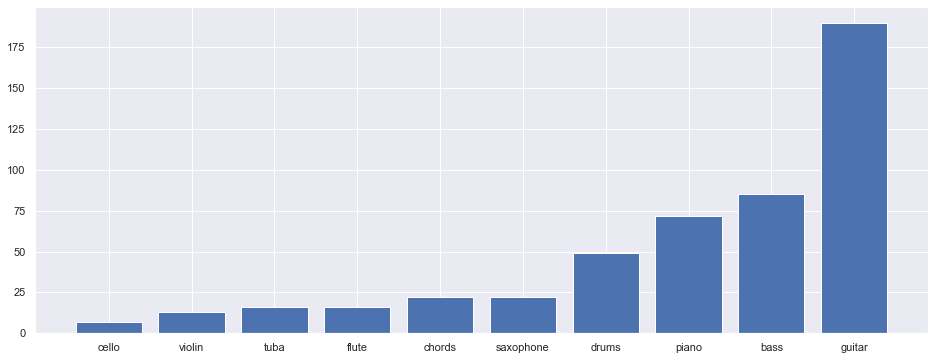

In [137]:
fig, ax = plt.subplots(figsize=(16,6))

plt.bar(instru_count.keys(), instru_count.values())

<BarContainer object of 20 artists>

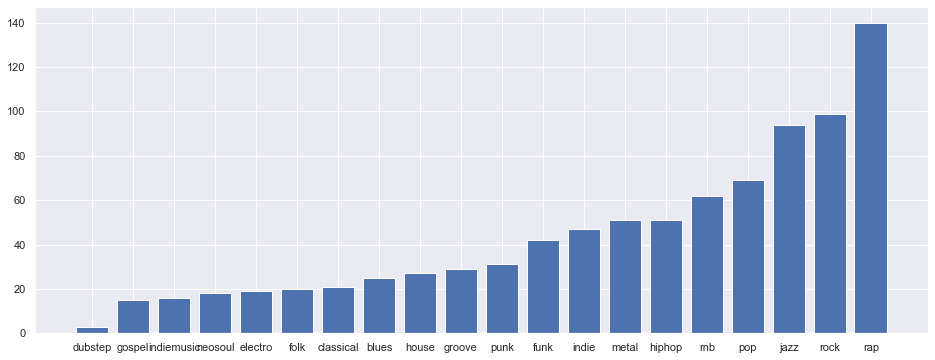

In [138]:
fig, ax = plt.subplots(figsize=(16,6))

plt.bar(style_count.keys(), style_count.values())

In [160]:
tab_style = []
tab_instrument = []

for i in range(len(data)):
    
    style_bool = np.array([any(m in w for w in ast.literal_eval(data.hashtags[i])) for m in style])
    tab_s = [i for i, x in enumerate(style_bool) if x]
    if tab_s != []:
        tab_style.append(min(tab_s))
    else:
        tab_style.append(None)
    
    instrument_bool = np.array([any(m in w for w in ast.literal_eval(data.hashtags[i])) for m in instrument])
    tab_i = [i for i, x in enumerate(instrument_bool) if x]
    if tab_i != []:
        tab_instrument.append(min(tab_i))
    else:
        tab_instrument.append(None)

In [162]:
data['style'] = tab_style
data['instrument'] = tab_instrument

<AxesSubplot:title={'center':'Distribution par style musical'}, ylabel='Frequency'>

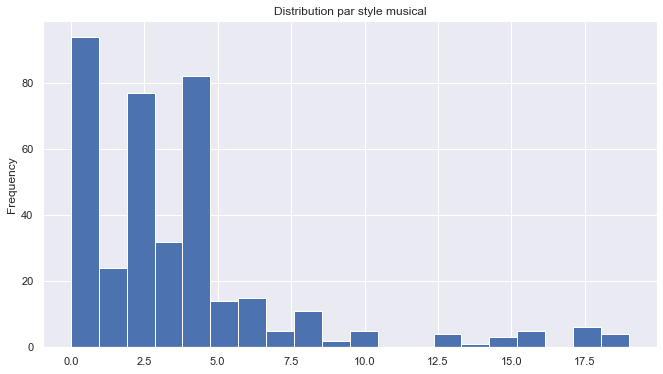

In [163]:
data['style'].plot.hist(title = 'Distribution par style musical', figsize=(11, 6), bins=len(style))

<AxesSubplot:title={'center':'Distribution par style instrument'}, ylabel='Frequency'>

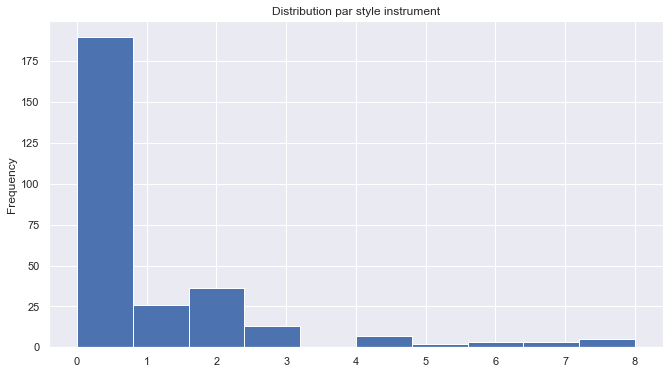

In [164]:
data['instrument'].plot.hist(title = 'Distribution par style instrument', figsize=(11, 6), bins=len(instrument))

In [179]:
print('proportion sans style attitré :', data['style'].isnull().sum(), '/', len(data))

proportion sans style attitré : 155 / 539


In [178]:
print('proportion sans instrument attitré :', data['instrument'].isnull().sum(), '/', len(data))

proportion sans instrument attitré : 254 / 539
